# Ocean Data Challenge
## AutoInsight Challenge: Navigating Through Doug’s Car Scores
### Interaction effects & non-linear relationships

### Luca Ordronneau

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

# Interaction effects & non-linear relationships

In [2]:
DATA_FILE = "./data/DougScore.csv"

In [3]:
data = pd.read_csv(DATA_FILE)

In [4]:
# Drop the unnecessary rows
df = data.iloc[2:].copy()

columns = [
    'Year', 'Brand', 'Model', 'Styling', 'Acceleration', 'Handling', 'Fun_Factor', 
    'Cool_Factor', 'Weekend_Total', 'Features', 'Comfort', 'Quality', 'Practicality', 
    'Value', 'Daily_Total', 'DougScore', 'Video_Link', 'Filming_Location', 'State', 'Vehicle_Country'
]
df.columns = columns

df.reset_index(drop=True, inplace=True)

# Convert columns to appropriate data types
numerical_columns = [
    'Year', 'Styling', 'Acceleration', 'Handling', 'Fun_Factor', 'Cool_Factor',
    'Weekend_Total', 'Features', 'Comfort', 'Quality', 'Practicality', 'Value', 
    'Daily_Total', 'DougScore'
]
df[numerical_columns] = df[numerical_columns].astype(float)

df.head()


,Year,Brand,Model,Styling,Acceleration,Handling,Fun_Factor,Cool_Factor,Weekend_Total,Features,Comfort,Quality,Practicality,Value,Daily_Total,DougScore,Video_Link,Filming_Location,State,Vehicle_Country
0,2020.0,McLaren,Speedtail,8.0,10.0,10.0,10.0,10.0,48.0,7.0,4.0,7.0,2.0,6.0,26.0,74.0,38:57:00,Columbus,Ohio,UK
1,1994.0,McLaren,F1,8.0,9.0,10.0,10.0,10.0,47.0,2.0,3.0,9.0,3.0,10.0,27.0,74.0,39:50:00,Burbank,California,UK
2,2022.0,Lucid,Air Dream Edition,7.0,10.0,6.0,7.0,8.0,38.0,9.0,8.0,7.0,5.0,6.0,35.0,73.0,39:40:00,Los Angeles,California,USA
3,2022.0,GMC,Hummer EV Pickup,5.0,9.0,4.0,9.0,7.0,34.0,9.0,7.0,7.0,9.0,7.0,39.0,73.0,33:42:00,Detroit,Michigan,USA
4,2021.0,Rivian,R1T,7.0,9.0,5.0,9.0,7.0,37.0,7.0,6.0,6.0,9.0,8.0,36.0,73.0,44:48:00,San Diego,California,USA


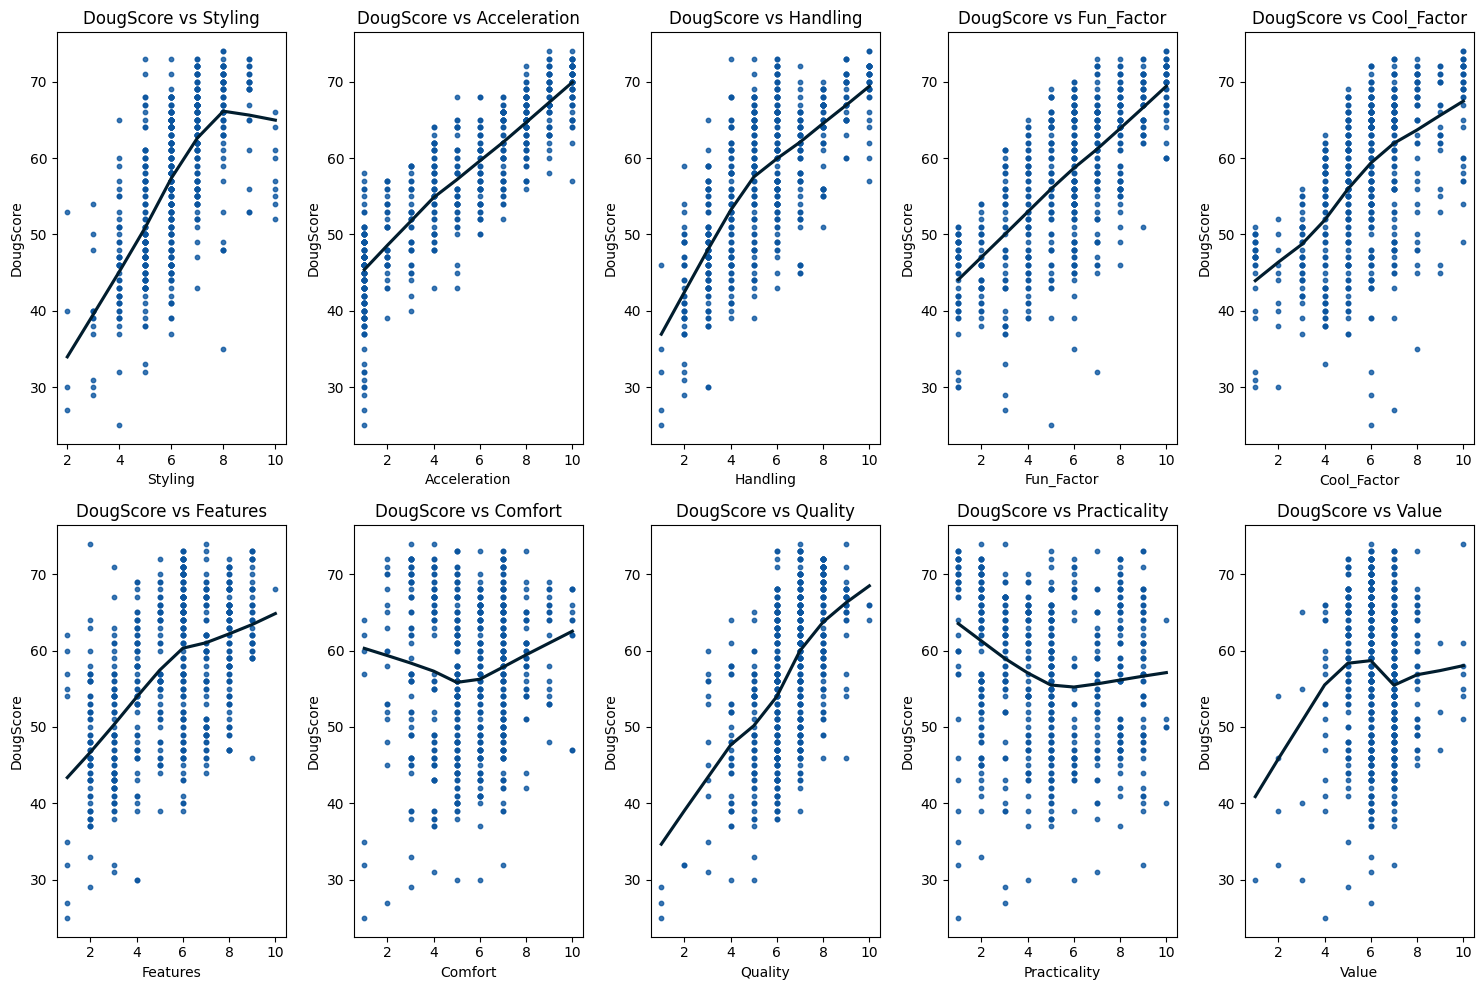

In [5]:
# Set color palette to gradient blues
sns.set_palette(sns.color_palette("Blues_r"))

# List of components to check for non-linear relationships
components = ['Styling', 'Acceleration', 'Handling', 'Fun_Factor', 'Cool_Factor', 'Features', 'Comfort', 'Quality', 'Practicality', 'Value']

# Plot scatter plots with smoothed curves for each component
plt.figure(figsize=(15, 10))
for i, component in enumerate(components, 1):
    plt.subplot(2, 5, i)
    sns.regplot(x=component, y='DougScore', data=df, scatter_kws={'s':10}, line_kws={'color':'#011d2e'}, lowess=True)
    plt.title(f"DougScore vs {component}")

plt.tight_layout()
plt.show()


In [6]:
# Using the gradient provided
gradient_colors = plt.cm.Blues([0.12, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

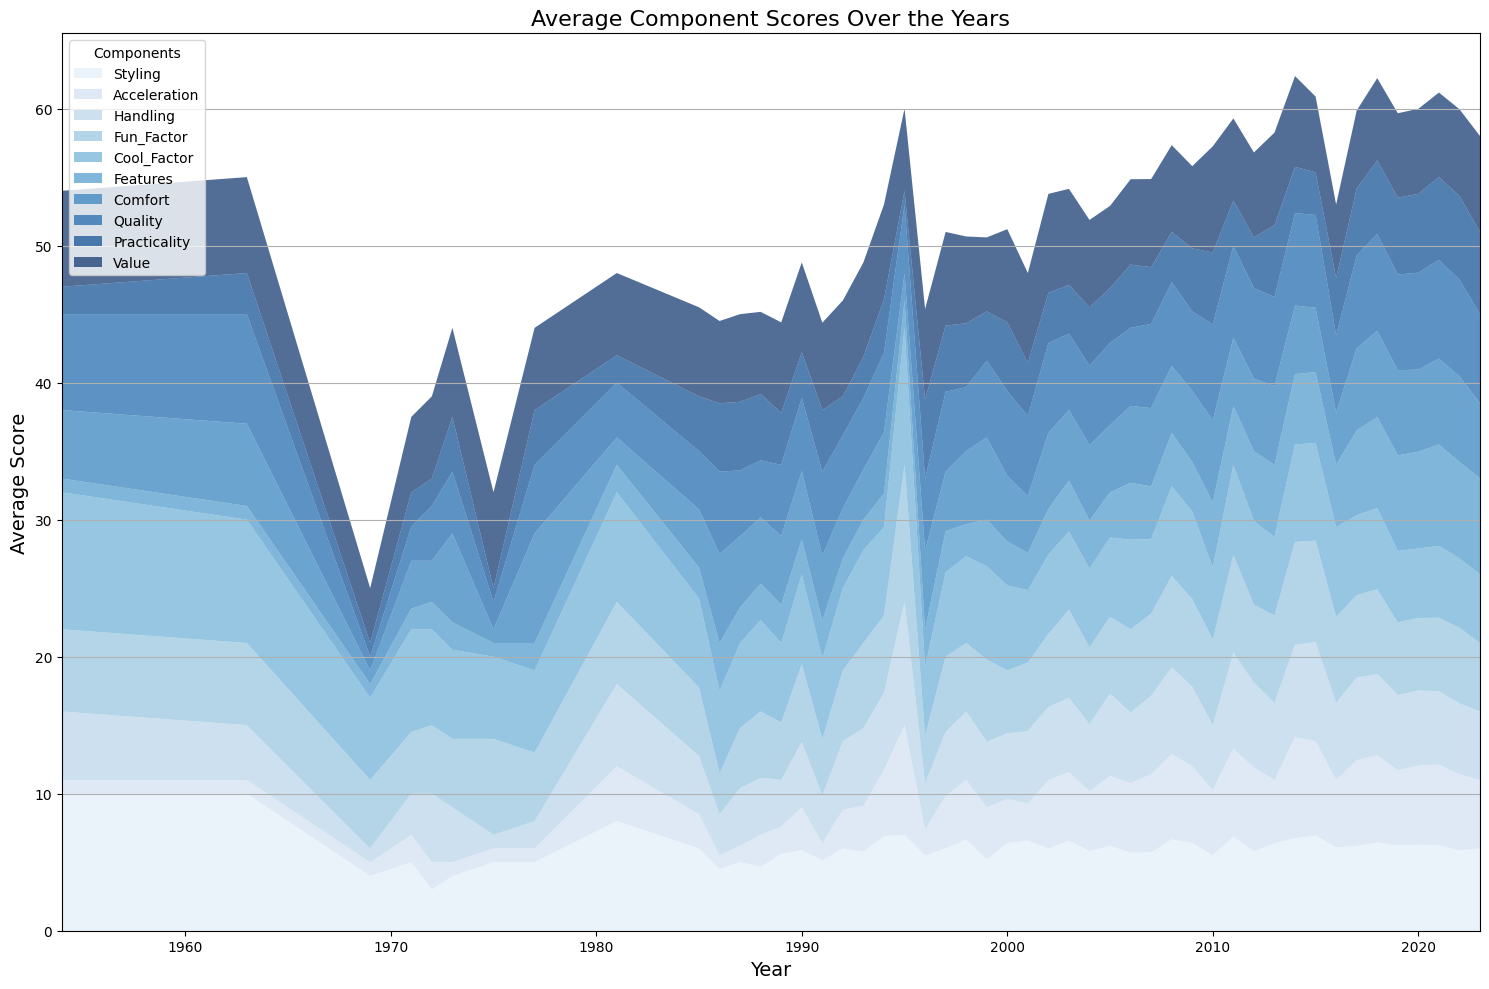

In [7]:
# Group by year and compute the mean for each component
avg_scores_per_year = df.groupby('Year')[['Styling', 'Acceleration', 'Handling', 'Fun_Factor', 
                                          'Cool_Factor', 'Features', 'Comfort', 'Quality', 
                                          'Practicality', 'Value']].mean()

# Plot the stream graph
fig, ax = plt.subplots(figsize=(15, 10))

ax.stackplot(avg_scores_per_year.index, avg_scores_per_year.T, labels=avg_scores_per_year.columns,
             colors=plt.cm.Blues([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), alpha=0.7)

ax.set_title("Average Component Scores Over the Years", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Average Score", fontsize=14)
ax.legend(loc="upper left", fontsize=10, title="Components")
ax.set_xlim(avg_scores_per_year.index.min(), avg_scores_per_year.index.max())
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

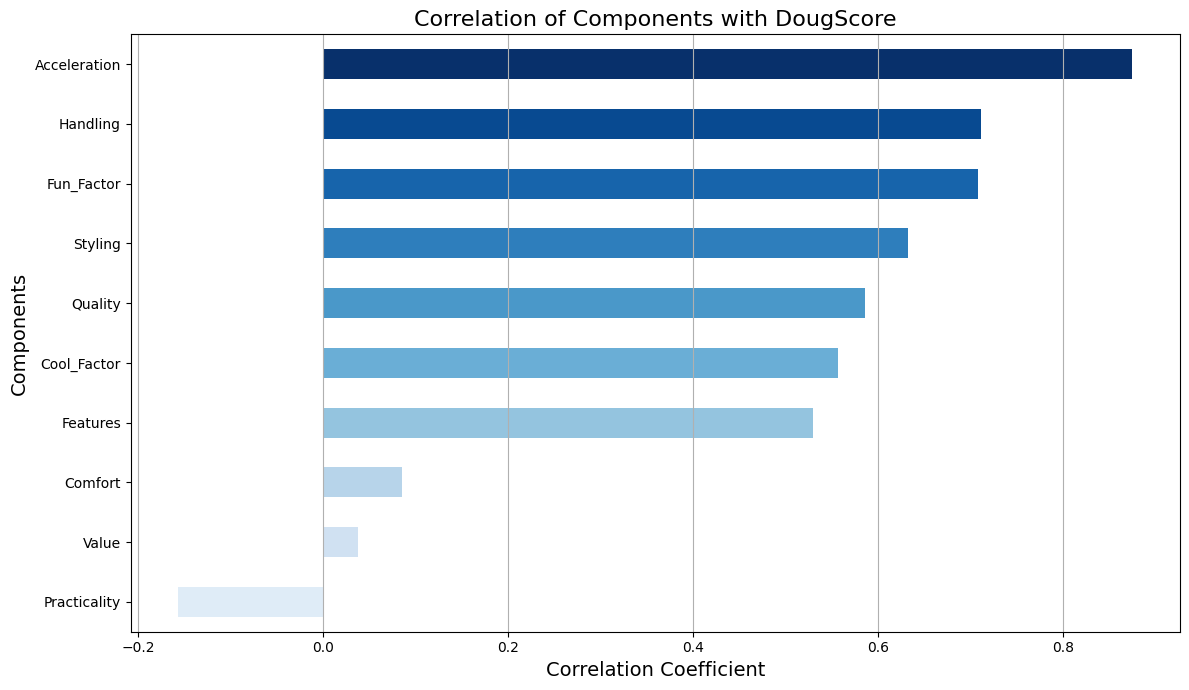

In [8]:
# Calculate the correlation of each component with DougScore
correlations = df[['Styling', 'Acceleration', 'Handling', 'Fun_Factor', 'Cool_Factor', 'Features', 
                   'Comfort', 'Quality', 'Practicality', 'Value', 'DougScore']].corr()['DougScore']

# Remove 'DougScore' from the series as it's correlation with itself is 1
correlations = correlations.drop('DougScore')

# Plot the correlations
plt.figure(figsize=(12, 7))
correlations.sort_values().plot(kind='barh', color=gradient_colors)
plt.title("Correlation of Components with DougScore", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Components", fontsize=14)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


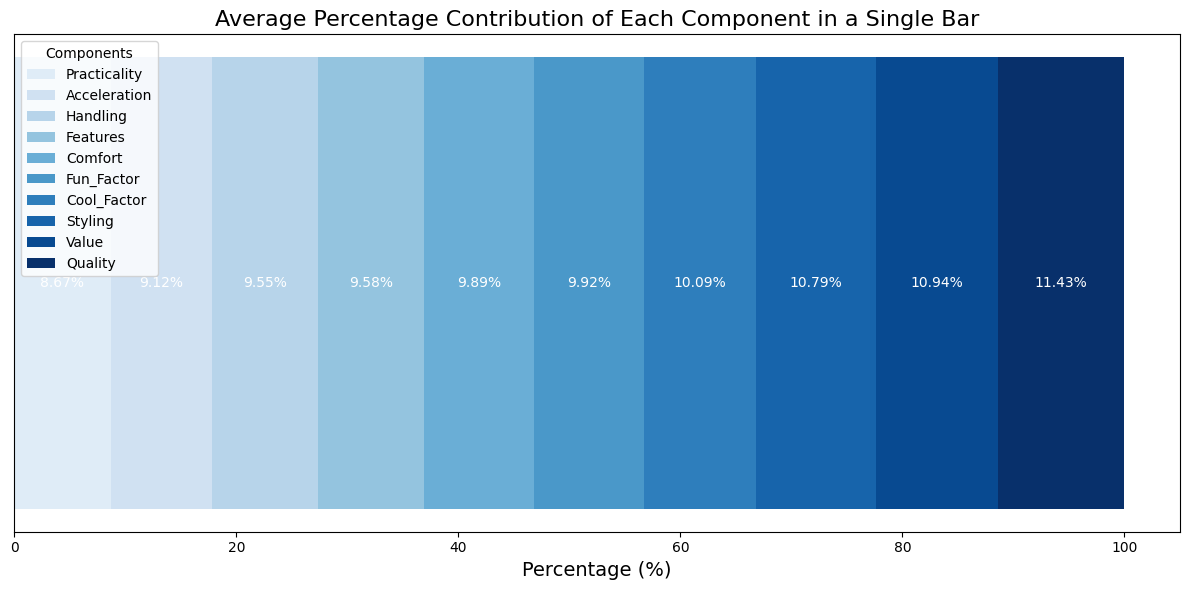

In [9]:
# Calculate the average scores for each component
average_scores = df[['Styling', 'Acceleration', 'Handling', 'Fun_Factor', 'Cool_Factor', 'Features', 
                     'Comfort', 'Quality', 'Practicality', 'Value']].mean()

# Convert the average scores to percentages
average_percentages = (average_scores / average_scores.sum()) * 100
average_percentages = average_percentages.sort_values()

# Plot a single stacked bar chart with percentage labels
plt.figure(figsize=(12, 6))
bottom_value = 0

# Create the stacked bar
for idx, (comp, value) in enumerate(average_percentages.items()):
    plt.barh('Components', value, left=bottom_value, color=gradient_colors[idx], label=comp)
    plt.text(bottom_value + value/2, 0, f"{value:.2f}%", va='center', ha='center', color='white')
    bottom_value += value

plt.yticks([])
plt.xlabel("Percentage (%)", fontsize=14)
plt.title("Average Percentage Contribution of Each Component in a Single Bar", fontsize=16)
plt.legend(loc="upper left", title="Components")
plt.grid(False, axis='x')
plt.tight_layout()
plt.show()


## Acceleration vs Handling

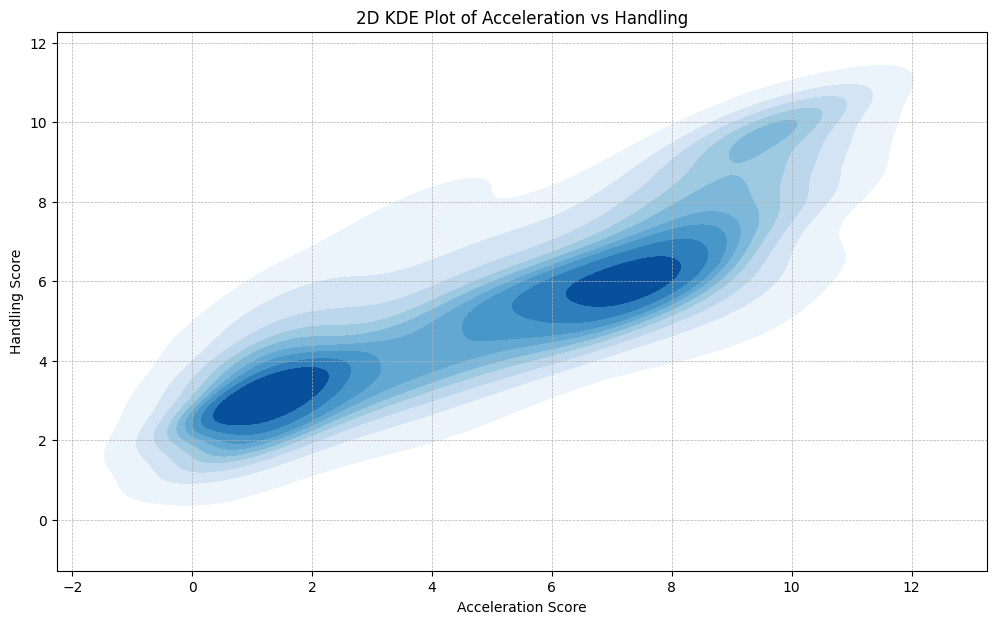

In [10]:
# Create a 2D KDE plot for Acceleration vs Handling
plt.figure(figsize=(12, 7))
sns.kdeplot(x=df['Acceleration'], y=df['Handling'], cmap='Blues', fill=True)
plt.title('2D KDE Plot of Acceleration vs Handling')
plt.xlabel('Acceleration Score')
plt.ylabel('Handling Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

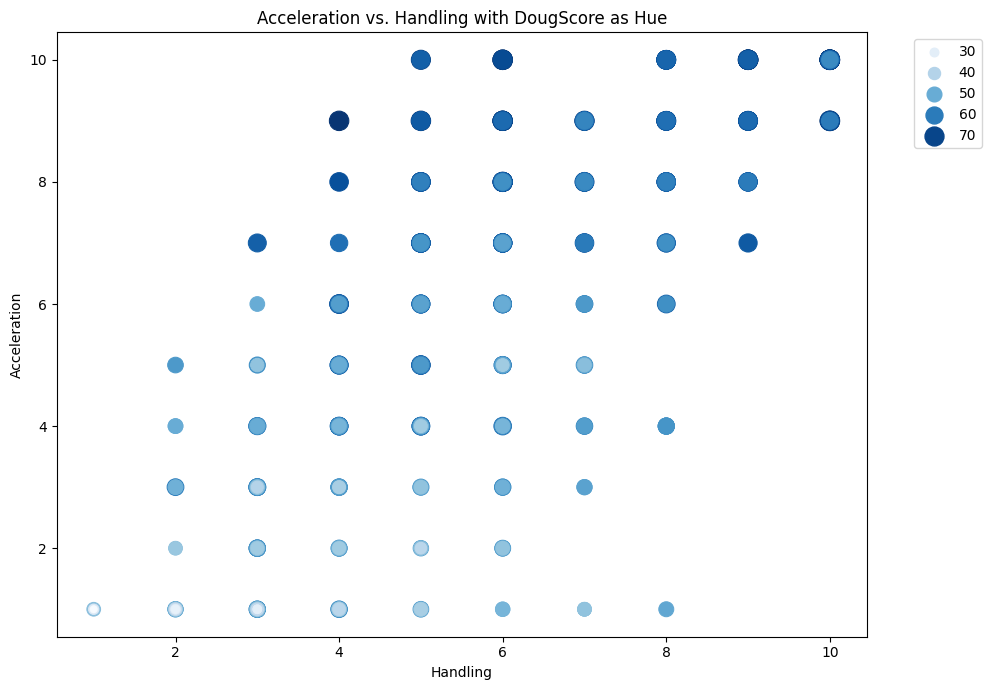

In [11]:
# Scatter plot for Acceleration vs. Handling with hue as DougScore
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Handling', y='Acceleration', hue='DougScore', palette="Blues", edgecolor=None, size='DougScore', sizes=(20, 200))
plt.title('Acceleration vs. Handling with DougScore as Hue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
X_linear = df[['Handling', 'Acceleration']]
X_linear = sm.add_constant(X_linear)  # adding a constant for the intercept
y = df['DougScore']

linear_model = sm.OLS(y, X_linear).fit()

# Checking the summary of the linear model
linear_model_summary = linear_model.summary()
linear_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DougScore   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     951.2
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          3.87e-184
Time:                        23:42:35   Log-Likelihood:                -1745.5
No. Observations:                 585   AIC:                             3497.
Df Residuals:                     582   BIC:                             3510.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.1787      0.540     78.167      0.000      41.119      43.238
Handling         0.1707      0.150      1.141      0.255      -0.123       0.465
Acceleration     2.6592      0.105     25.397      0.000       2.454       2.865
==============================================================================
Omnibus:                       32.035   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.013
Skew:                          -0.471   Prob(JB):                     4.57e-10
Kurtosis:                       3.937   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Value and Quality

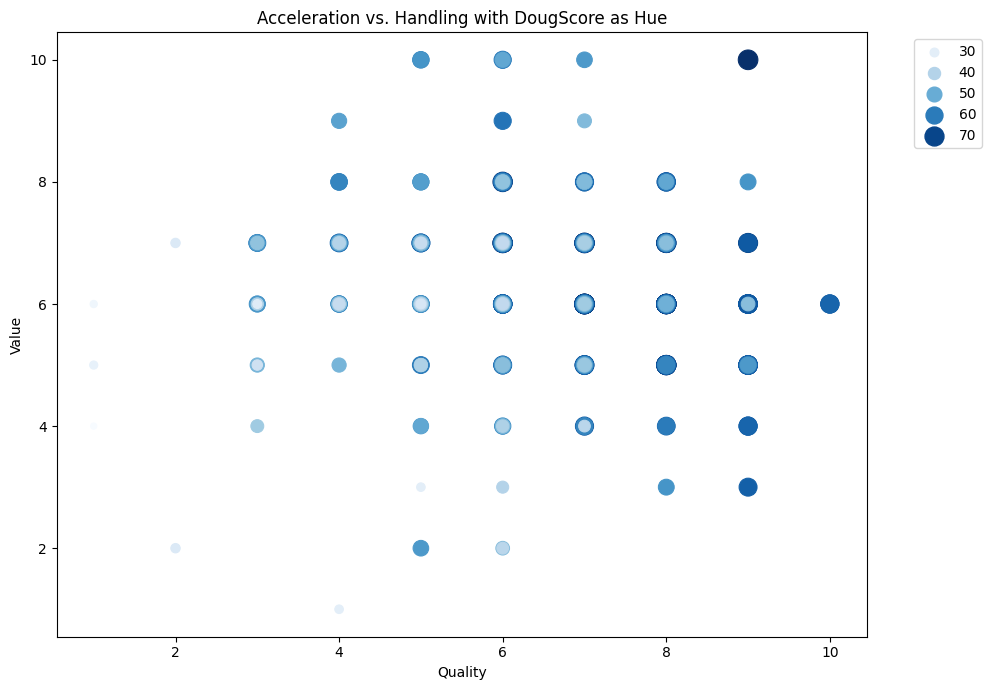

In [13]:
# Scatter plot for Acceleration vs. Handling with hue as DougScore
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Quality', y='Value', hue='DougScore', palette="Blues", edgecolor=None, size='DougScore', sizes=(20, 200))
plt.title('Acceleration vs. Handling with DougScore as Hue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


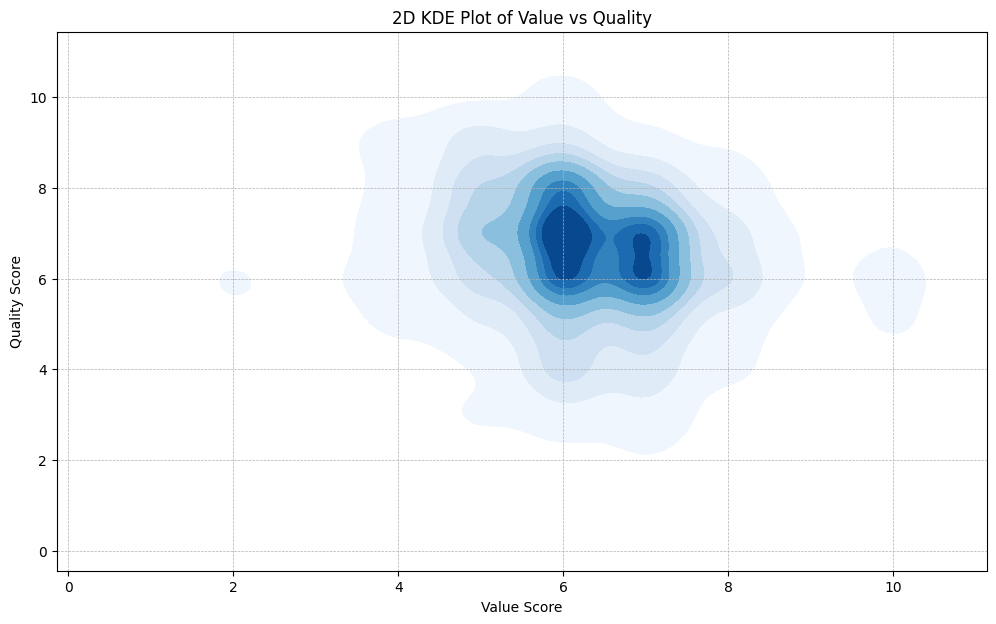

In [14]:
# Create a 2D KDE plot for Value vs Quality
plt.figure(figsize=(12, 7))
sns.kdeplot(x=df['Value'], y=df['Quality'], cmap='Blues', fill=True)
plt.title('2D KDE Plot of Value vs Quality')
plt.xlabel('Value Score')
plt.ylabel('Quality Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [15]:
X_linear = df[['Value', 'Quality']]
X_linear = sm.add_constant(X_linear)  # adding a constant for the intercept
y = df['DougScore']

linear_model = sm.OLS(y, X_linear).fit()

# Checking the summary of the linear model
linear_model_summary = linear_model.summary()
linear_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DougScore   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           3.35e-55
Time:                        23:42:36   Log-Likelihood:                -2043.9
No. Observations:                 585   AIC:                             4094.
Df Residuals:                     582   BIC:                             4107.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9538      2.546      9.802      0.000      19.954      29.954
Value          0.7358      0.302      2.437      0.015       0.143       1.329
Quality        4.2095      0.238     17.674      0.000       3.742       4.677
==============================================================================
Omnibus:                       43.776   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.994
Skew:                          -0.189   Prob(JB):                     0.000124
Kurtosis:                       2.228   Cond. No.                         70.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fun Factor and Practicality

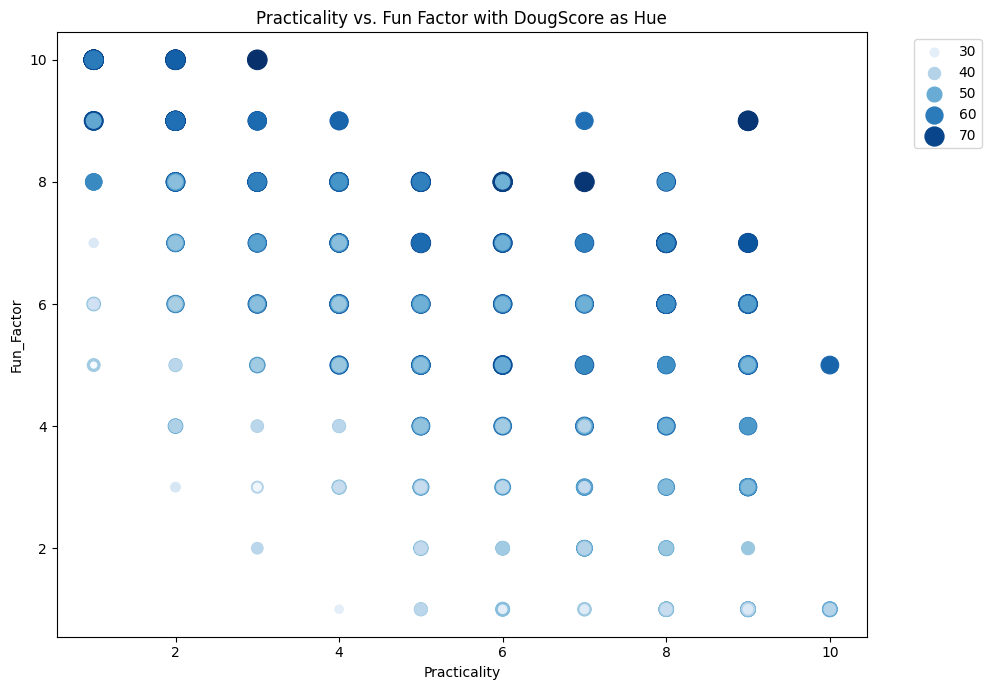

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Practicality', y='Fun_Factor', hue='DougScore', palette="Blues", edgecolor=None, size='DougScore', sizes=(20, 200))
plt.title('Practicality vs. Fun Factor with DougScore as Hue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

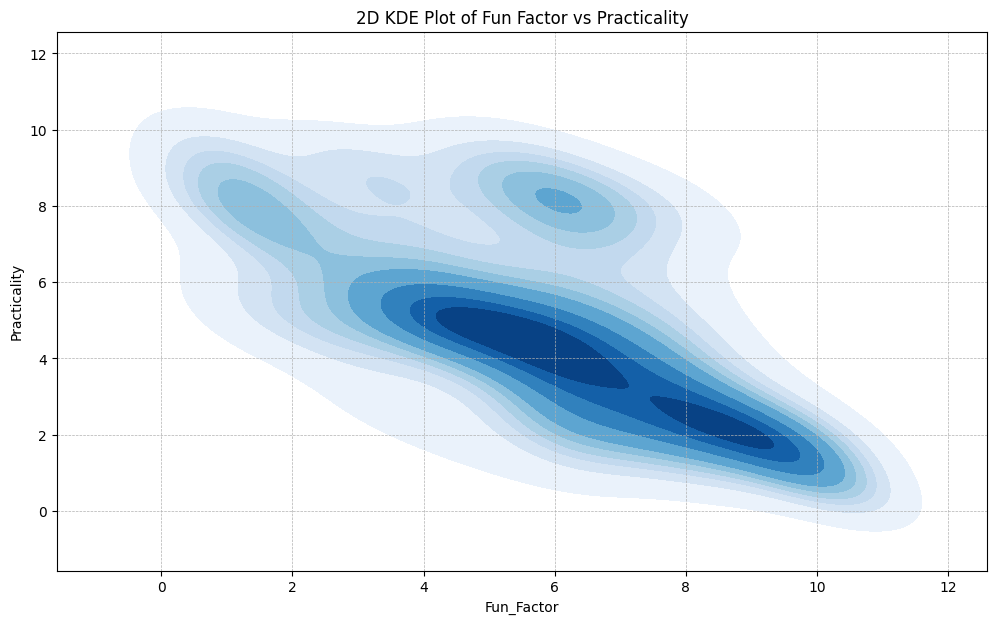

In [17]:
plt.figure(figsize=(12, 7))
sns.kdeplot(x=df['Fun_Factor'], y=df['Practicality'], cmap='Blues', fill=True)
plt.title('2D KDE Plot of Fun Factor vs Practicality')
plt.xlabel('Fun_Factor')
plt.ylabel('Practicality')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [18]:
X_linear = df[['Practicality', 'Fun_Factor']]
X_linear = sm.add_constant(X_linear)  # adding a constant for the intercept
y = df['DougScore']

linear_model = sm.OLS(y, X_linear).fit()

# Checking the summary of the linear model
linear_model_summary = linear_model.summary()
linear_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DougScore   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     503.1
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          1.36e-127
Time:                        23:42:36   Log-Likelihood:                -1876.4
No. Observations:                 585   AIC:                             3759.
Df Residuals:                     582   BIC:                             3772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           25.4466      1.241     20.510      0.000      23.010      27.883
Practicality     1.8581      0.128     14.514      0.000       1.607       2.110
Fun_Factor       3.9501      0.127     31.101      0.000       3.701       4.200
==============================================================================
Omnibus:                       31.938   Durbin-Watson:                   1.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.810
Skew:                          -0.572   Prob(JB):                     1.67e-08
Kurtosis:                       3.402   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df['Practicality_squared'] = df['Practicality'] ** 2
df['Fun_Factor_squared'] = df['Fun_Factor'] ** 2

X_quadratic = df[['Practicality', 'Practicality_squared', 'Fun_Factor', 'Fun_Factor_squared']]
X_quadratic = sm.add_constant(X_quadratic)  # adding a constant for the intercept

quadratic_model = sm.OLS(y, X_quadratic).fit()

quadratic_model_summary = quadratic_model.summary()
quadratic_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DougScore   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     261.5
Date:                Sun, 29 Oct 2023   Prob (F-statistic):          2.77e-128
Time:                        23:42:36   Log-Likelihood:                -1868.5
No. Observations:                 585   AIC:                             3747.
Df Residuals:                     580   BIC:                             3769.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   23.0928      1.722     13.411      0.000      19.711      26.475
Practicality             3.8567      0.564      6.842      0.000       2.750       4.964
Practicality_squared    -0.1796      0.050     -3.590      0.000      -0.278      -0.081
Fun_Factor               2.7065      0.432      6.265      0.000       1.858       3.555
Fun_Factor_squared       0.1309      0.041      3.213      0.001       0.051       0.211
==============================================================================
Omnibus:                       25.355   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.466
Skew:                          -0.511   Prob(JB):                     1.09e-06
Kurtosis:                       3.290   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""